# IMPORT DATA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data_rs = pd.read_excel("Masukan.xlsx")
data_rs

,Id,Umur,Kunjungan
0,1,27,5
1,2,40,1
2,3,35,5
3,4,23,5
4,5,8,2
...,...,...,...
95,96,36,4
96,97,42,4
97,98,23,3
98,99,6,1


In [ ]:
def importdata():
  arrData = []
  data_rs = pd.read_excel("Masukan.xlsx")
  for i in range(len(data_rs['Id'])):
    arrData.append([])
    arrData[i].append(data_rs['Id'][i])
    arrData[i].append(data_rs['Umur'][i])
    arrData[i].append(data_rs['Kunjungan'][i])
  return arrData
data_rs = importdata()


In [ ]:
#umur : anak,remaja,dewasa
#kunjungan : jarang, sering
#score : baik, buruk

# UMUR

In [ ]:
def fuzzy_umur(usia):
  #dewasa
  if usia >= 45:
    dewasa = 1
  elif usia >= 25 and usia < 50:
    dewasa = (usia - 25) / (50 - 25)
  else:
    dewasa = 0
 
 #anak"
  if usia <= 5:
    anak = 1
  elif usia >= 25 and usia < 50:
    anak = (usia - 25) / (50 - 25)
  else:
    anak = 0

  #remaja
  if usia > 17 and usia <= 30:
    remaja = 1
  elif usia >= 25 and usia < 50:
    remaja = (usia - 25) / (50 - 25)
  else:
    remaja = 0
  
  return round(anak,2),round(remaja,2),round(dewasa,2)



# KUNJUNGAN

In [ ]:
def fuzzy_kunjungan(datang):
  if datang >= 3:
    sering = 1
  elif datang >= 2 and datang < 4:
    sering = (datang - 2) / (4 - 2)
  else:
    sering = 0

  if datang <= 2:
    jarang = 1
  elif datang >= 2 and datang < 4:
    jarang = (datang - 2) / (4 - 2)
  else:
    jarang = 0
  
  return round(jarang,1), round(sering,1) 

#hasil_fuzzy_income = fuzzification_kunjungan     

# Bagian Baru

In [ ]:
def rulesfuzzy(umur,kunjungan):
  arrRules = [
      ['buruk',min(umur[1],kunjungan[1])],
      ['buruk',min(umur[1],kunjungan[2])],
      ['buruk',min(umur[1],kunjungan[3])],
      ['baik',min(umur[2],kunjungan[1])],
      ['baik',min(umur[2],kunjungan[2])],
      ['baik',min(umur[2],kunjungan[3])]]

  return arrRules

In [ ]:
def infrance(arrRules):
  arrBaik = []
  arrBuruk = []
  for x in range(len(arrRules)):
    if(arrRules[x][0] == 'baik'):
      arrBaik.append(arrRules[x][1])
    elif(arrRules[x][0] == 'buruk'):
      arrBuruk.append(arrRules[x][1])
  return max(arrBaik),max(arrBuruk)

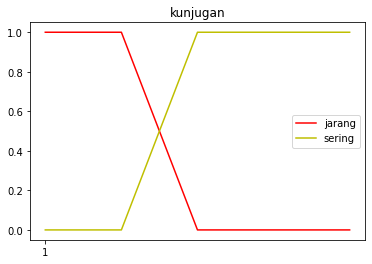

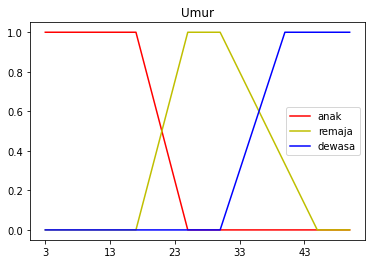

In [ ]:
data_rs = importdata()
kunjungan()
print()

umur()
print()

arrfuzzyU = []
for i in range(len(data_rs)):
  arrfuzzyU.append(fuzzy_umur(data_rs[i][1]))

arrfuzzyK = []
for i in range(len(data_rs)):
  arrfuzzyK.append(fuzzy_kunjungan(data_rs[i][2]))

In [ ]:
#Menampilkan grafik fungsi Umur
def umur():
  x1 = [3, 6, 25, 50]
  y1 = [1, 1, 0, 0]

  x2 = [3, 6, 17, 25, 45, 50]
  y2 = [0, 0, 1, 1, 0, 0]

  x3 = [3, 30, 40, 50]
  y3 = [0, 0, 1, 1]

  plt.plot(x1, y1, 'r-', label = 'anak')
  plt.plot(x2, y2, 'y-', label = 'remaja')
  plt.plot(x3, y3, 'b-', label = 'dewasa')

  plt.title('Umur')
  plt.legend()
  plt.xticks(np.arange(min(x1), max(x1)+1, 10.0))
  plt.show()

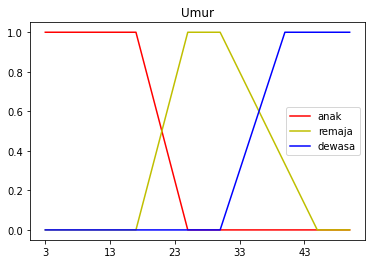

In [ ]:
umur()

In [ ]:
def kunjungan():
  x1 = [1,2,3,4,5]
  y1 = [1,1,0,0,0]

  x2 = [1,2,3,4,5]
  y2 = [0, 0, 1, 1, 1]

  plt.plot(x1, y1, 'r-', label = 'jarang')
  plt.plot(x2, y2, 'y-', label = 'sering')
 

  plt.title('kunjugan')
  plt.legend()
  plt.xticks(np.arange(min(x1), max(x1)+1, 10.0))
  plt.show()

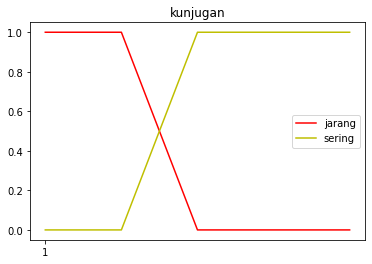

In [ ]:
kunjungan()

In [ ]:
#menghasilkan nilai defuzzifikasi 
#prosedur defuzzifikasi
def deFuzzy(arrInference):
  kiri = 0 
  kanan = 0
  total = 0
  mamdani = [10,20,30,40,50]
  for i in range(len(mamdani)):
    if (mamdani[i] <= 40):
      kiri = kiri + (mamdani[i] * arrInference[0])
      total = total + arrInference[0]
    elif (mamdani[i] >= 50):
      kanan = kanan + (mamdani[i] * arrInference[0])
      total = total + arrInference[1]

  return (kanan + kiri)/total

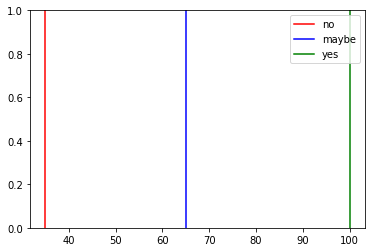

In [ ]:
inf = [1, 3, 5]
def defuzzification(inf):
    return ((inf[1]*35)+(inf[3]*65)+(inf[5]*100))/(inf[1]+inf[3]+inf[5])

#model sugeno
plt.axvline(x=35, color='red', label='no')
plt.axvline(x=65, color='blue', label='maybe')
plt.axvline(x=100, color = 'green', label='yes')
plt.legend()

In [ ]:
score = []
for i in range (5):
  score.append(70)
for i in range (10):
  score.append(40)
for i in range (5):
  score.append(100)
print(score)

[70, 70, 70, 70, 70, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 100, 100, 100, 100, 100]


In [ ]:
arrfinalResult = []

for i in range(len(data_rs)):
  fuzzy = rulesfuzzy(arrfuzzyU,arrfuzzyK)
  infer = infrance(fuzzy)
  arrfinalResult.append([i+1,deFuzzy(infer)])

  arrfinalResult = finalResult(arrfinalResult)
  print('Id', arrfinalResult)

TypeError: ignored

In [ ]:
dataExcel = data_rs.copy()
dataExcel.sort_values('score', ascending=False, inplace=True)
dataExcel

In [ ]:
dataExcel = dataExcel[:10]
dataExcel['Id'].to_excel('luaran.xls', index=False)